## Instructions

Using this data set, as well any outside data (if desired), provide any insights you can glean about the recent activity in the IPO market.  Please include some summary statistics, charts, as well as some brief notes regarding points that you found interesting.  Compile your results within this workbook.  If using any formulas, or pivot tables, please note those within the workbook, or keep them active.

## Standard Imports

In [3]:
import pandas as pd 
import numpy as np
import datetime as dt 
import plotly.express as px
from pathlib import Path 

%matplotlib inline 

## Loading CSV & Data Cleaning

In [5]:
# Load the data into a df and set the date as the index
PitchBook_IPO_csv = Path("IPO.csv")
IPO = pd.read_csv(PitchBook_IPO_csv, index_col = "Close Date",infer_datetime_format=True, parse_dates=True)
IPO = IPO.sort_index() 
IPO.head() 

,Company ID,Company Name,Company Description,Deal ID,Deal #,Announce Date,Deal Status,"Capital Raised (millions, USD)","Post-money Valuation (millions, USD)",Opening Price Per Share,...,Deal Type 2,Deal Type 3,Industry Sector,Industry Group,Industry Code,Exit Type,City,State,Zip,Country
Close Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,224358-49,Nachiketa Agrotech,Operator of nursery plantation company. The co...,100560-34T,2,NaN,Failed/Cancelled,NaN,NaN,NaN,...,NaN,NaN,Materials and Resources,Agriculture,Horticulture,PE Exit,Delhi,NaN,110092,India
2014-01-01,13386-16,Smiths Group,With its start as a London jeweler in the 19th...,54936-19T,1,NaN,Completed,NaN,NaN,NaN,...,NaN,NaN,Business Products and Services (B2B),Commercial Services,Other Commercial Services,NaN,London,England,SW1Y 4LB,United Kingdom
2014-01-01,54738-37,Accelera Innovations,Accelera Innovations Inc is a U.S based health...,72932-50T,1,NaN,Completed,NaN,NaN,NaN,...,NaN,NaN,Financial Services,Capital Markets/Institutions,Other Capital Markets/Institutions,NaN,Frankfort,Illinois,60423,United States
2014-01-01,62352-19,Gan & Lee,Gan & Lee Pharmaceuticals Co Ltd is a biopharm...,128168-47T,7,NaN,Failed/Cancelled,NaN,NaN,NaN,...,NaN,NaN,Healthcare,Pharmaceuticals and Biotechnology,Pharmaceuticals,VC Exit,Beijing,NaN,101109,China
2014-01-01,63719-38,Hospitality Investors Trust,Hospitality Invs Tr Inc is a self-managed real...,85761-37T,1,NaN,Completed,645,NaN,NaN,...,NaN,NaN,Financial Services,Other Financial Services,Real Estate Investment Trusts (REITs),NaN,New York,New York,10022,United States


In [6]:
# Count null values
IPO.isnull().sum()

Company ID                                 0
Company Name                               0
Company Description                       80
Deal ID                                    0
Deal #                                     0
Announce Date                           3060
Deal Status                                0
Capital Raised (millions, USD)          2409
Post-money Valuation (millions, USD)    3474
Opening Price Per Share                 3210
Filing Range                            6339
Deal Type 1                                0
Deal Type 2                             7615
Deal Type 3                             8408
Industry Sector                            0
Industry Group                             0
Industry Code                              0
Exit Type                               4305
City                                       0
State                                   4683
Zip                                     1237
Country                                    0
dtype: int

In [7]:
# Drop null values for this df --> we will be creating multiple to relfect the different needs of each analysis
# This dataframe will be used to analyze the qualitative data
#IPO = IPO.dropna().copy()
#IPO.isnull().sum()

In [8]:
# Convert the data types to
#IPO = IPO.convert_dtypes()
#IPO.info()

In [9]:
# Most companies that IPO over the period were Pharma companies
#IPO['Industry Group'].describe()

In [10]:
# The NaN free df has no earnings information, let's make a new one
# Shortening the name of some columns
earnings_df = IPO.drop(
    columns = ['Announce Date','Industry Group','Industry Code','Zip',
               'State','Deal Type 2','Deal Type 3','Filing Range',
               'Company Description']).copy()
earnings_df = earnings_df.rename(
    columns = {'Capital Raised (millions, USD)':'Capital Raised',
               'Post-money Valuation (millions, USD)':'Post-money Valuation'})
earnings_df.head()

,Company ID,Company Name,Deal ID,Deal #,Deal Status,Capital Raised,Post-money Valuation,Opening Price Per Share,Deal Type 1,Industry Sector,Exit Type,City,Country
Close Date,,,,,,,,,,,,,
2014-01-01,224358-49,Nachiketa Agrotech,100560-34T,2,Failed/Cancelled,NaN,NaN,NaN,IPO,Materials and Resources,PE Exit,Delhi,India
2014-01-01,13386-16,Smiths Group,54936-19T,1,Completed,NaN,NaN,NaN,IPO,Business Products and Services (B2B),NaN,London,United Kingdom
2014-01-01,54738-37,Accelera Innovations,72932-50T,1,Completed,NaN,NaN,NaN,IPO,Financial Services,NaN,Frankfort,United States
2014-01-01,62352-19,Gan & Lee,128168-47T,7,Failed/Cancelled,NaN,NaN,NaN,IPO,Healthcare,VC Exit,Beijing,China
2014-01-01,63719-38,Hospitality Investors Trust,85761-37T,1,Completed,645,NaN,NaN,IPO,Financial Services,NaN,New York,United States


In [11]:
earnings_df.isnull().sum()

Company ID                    0
Company Name                  0
Deal ID                       0
Deal #                        0
Deal Status                   0
Capital Raised             2409
Post-money Valuation       3474
Opening Price Per Share    3210
Deal Type 1                   0
Industry Sector               0
Exit Type                  4305
City                          0
Country                       0
dtype: int64

In [12]:
# I chose to refine this data set dropping values over filling w/ dummy data, didn't want to water down the findings
# Dropping NaNs & NaTs
earnings_df2 = earnings_df.dropna(
    subset = ['Capital Raised', 'Post-money Valuation', 
              'Opening Price Per Share','Exit Type'])
earnings_df2 = earnings_df2.loc[earnings_df2.index.dropna()]
earnings_df2.isnull().sum()

Company ID                 0
Company Name               0
Deal ID                    0
Deal #                     0
Deal Status                0
Capital Raised             0
Post-money Valuation       0
Opening Price Per Share    0
Deal Type 1                0
Industry Sector            0
Exit Type                  0
City                       0
Country                    0
dtype: int64

In [13]:
# Checking variables types
# To convert the columns containing finacial data
earnings_df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6739 entries, 2014-01-10 to 2020-09-30
Data columns (total 13 columns):
Company ID                 6739 non-null object
Company Name               6739 non-null object
Deal ID                    6739 non-null object
Deal #                     6739 non-null int64
Deal Status                6739 non-null object
Capital Raised             6739 non-null object
Post-money Valuation       6739 non-null object
Opening Price Per Share    6739 non-null object
Deal Type 1                6739 non-null object
Industry Sector            6739 non-null object
Exit Type                  6739 non-null object
City                       6739 non-null object
Country                    6739 non-null object
dtypes: int64(1), object(12)
memory usage: 737.1+ KB


In [14]:
# Changing the data types of columns in question
# Using float16 to reflect values in mUSD
# Will look into pythons suggestion later --> this is not a major error
earnings_df2['Capital Raised'] = earnings_df2['Capital Raised'].str.replace(',','')
earnings_df2['Capital Raised'] = earnings_df2['Capital Raised'].astype('float')

earnings_df2['Post-money Valuation'] = earnings_df2['Post-money Valuation'].str.replace(',','')
earnings_df2['Post-money Valuation'] = earnings_df2['Post-money Valuation'].astype('float')

earnings_df2['Opening Price Per Share'] = earnings_df2['Opening Price Per Share'].str.replace(',','')
earnings_df2['Opening Price Per Share'] = earnings_df2['Opening Price Per Share'].astype('float')

In [15]:
# Now we will be able to manipulate the data!
earnings_df2.dtypes

Company ID                  object
Company Name                object
Deal ID                     object
Deal #                       int64
Deal Status                 object
Capital Raised             float64
Post-money Valuation       float64
Opening Price Per Share    float64
Deal Type 1                 object
Industry Sector             object
Exit Type                   object
City                        object
Country                     object
dtype: object

In [29]:
earnings_df2.tail()

,Company ID,Company Name,Deal ID,Deal #,Deal Status,Capital Raised,Post-money Valuation,Opening Price Per Share,Deal Type 1,Industry Sector,Exit Type,City,Country
Close Date,,,,,,,,,,,,,
2020-09-30,43117-84,Palantir Technologies,139209-22T,33,Completed,2571.35,21000.00,10.0,IPO,Information Technology,VC Exit,Denver,United States
2020-09-30,265629-52,ChinData Group,129921-04T,3,Completed,540.00,4849.60,13.5,IPO,Information Technology,PE Exit,Beijing,China
2020-09-30,57432-34,Boqii Pets,155749-78T,12,Completed,70.00,907.53,10.0,IPO,Consumer Products and Services (B2C),VC Exit,Shanghai,China
2020-09-30,53371-99,Asana,131132-62T,9,Completed,810.82,4100.00,27.0,IPO,Information Technology,VC Exit,San Francisco,United States
2020-09-30,43117-84,Palantir Technologies,139209-22T,33,Completed,2571.35,21000.00,10.0,IPO,Information Technology,VC Exit,Denver,United States


## Summary Statistics, Performance Metrics & Market Analysis

### Market Analysis

In [73]:
# Counting all unique industies
print(earnings_df2['Industry Sector'].unique())

['Healthcare' 'Financial Services' 'Energy'
 'Business Products and Services (B2B)' 'Information Technology'
 'Consumer Products and Services (B2C)' 'Materials and Resources']


In [74]:
earnings_df2['Industry Sector'].value_counts(normalize=True)

Healthcare                              0.299748
Information Technology                  0.216798
Business Products and Services (B2B)    0.176139
Consumer Products and Services (B2C)    0.164416
Financial Services                      0.086511
Materials and Resources                 0.029975
Energy                                  0.026413
Name: Industry Sector, dtype: float64

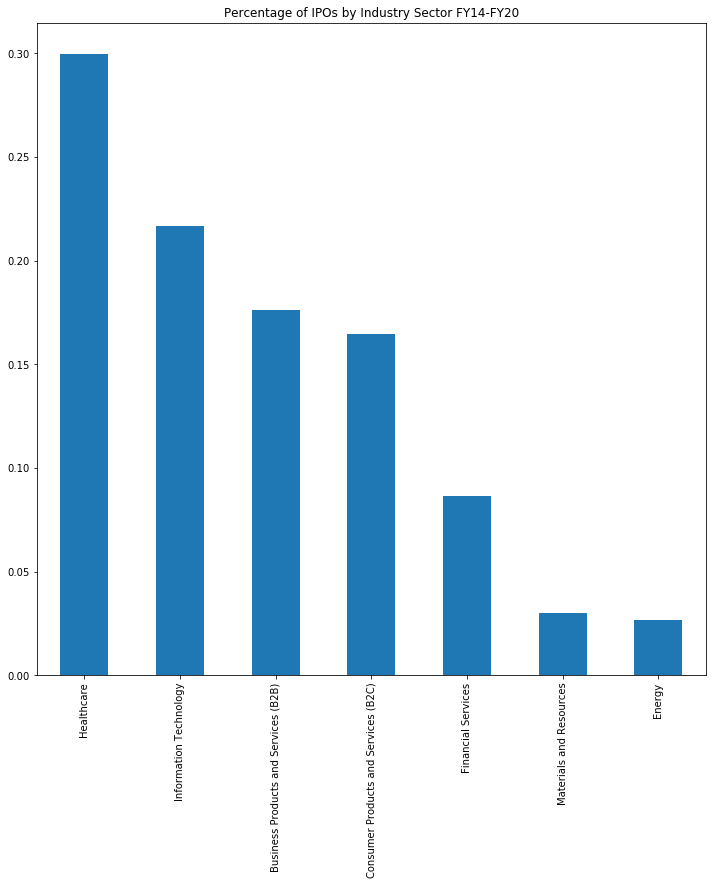

In [59]:
# Plot the percentage of IPOs by Country FY14-FY20
earnings_df2['Industry Sector'].value_counts(normalize=True).plot.bar(
    figsize=(12,12), title = 'Percentage of IPOs by Industry Sector FY14-FY20')

In [79]:
# Counting all unique countries
print(earnings_df2['Country'].unique())

['United States' 'China' 'Netherlands' 'United Kingdom' 'France' 'Italy'
 'Sweden' 'Israel' 'Australia' 'Poland' 'Japan' 'Denmark'
 'United Arab Emirates' 'Cyprus' 'Bermuda' 'Cayman Islands' 'Finland'
 'Switzerland' 'Ireland' 'Spain' 'Germany' 'Luxembourg' 'Canada' 'Belgium'
 'Malaysia' 'Norway' 'Austria' 'Philippines' 'Romania' 'Hong Kong'
 'Argentina' 'New Zealand' 'Singapore' 'Zambia' 'India' 'South Africa'
 'South Korea' 'Oman' 'Gibraltar' 'Mexico' 'Egypt' 'Hungary'
 'British Virgin Islands' 'Barbados' 'Czech Republic' 'Indonesia'
 'Zimbabwe' 'Malta' 'Vietnam' 'Estonia' 'Saudi Arabia' 'Taiwan' 'Russia'
 'Tunisia' 'Rwanda' 'Brazil' 'Croatia' 'Turkey' 'Thailand' 'Jamaica'
 'Mongolia' 'Iceland' 'Monaco' 'Costa Rica' 'Uganda' 'Nigeria' 'Togo'
 'Chad']


In [80]:
# Taking a proportion of IPO by country
earnings_df2['Country'].value_counts(normalize=True)

United States             0.386407
China                     0.195875
United Kingdom            0.061582
Sweden                    0.053866
Japan                     0.043923
India                     0.025078
Australia                 0.024930
France                    0.024336
Canada                    0.018549
Germany                   0.015581
Israel                    0.013355
Finland                   0.012020
Italy                     0.009200
Netherlands               0.009052
Denmark                   0.008755
South Korea               0.008458
Norway                    0.007865
Switzerland               0.007419
Spain                     0.005639
Ireland                   0.005342
Brazil                    0.005045
Hong Kong                 0.005045
New Zealand               0.005045
Belgium                   0.004452
Poland                    0.004155
Singapore                 0.003858
Russia                    0.002523
Indonesia                 0.002077
Mexico              

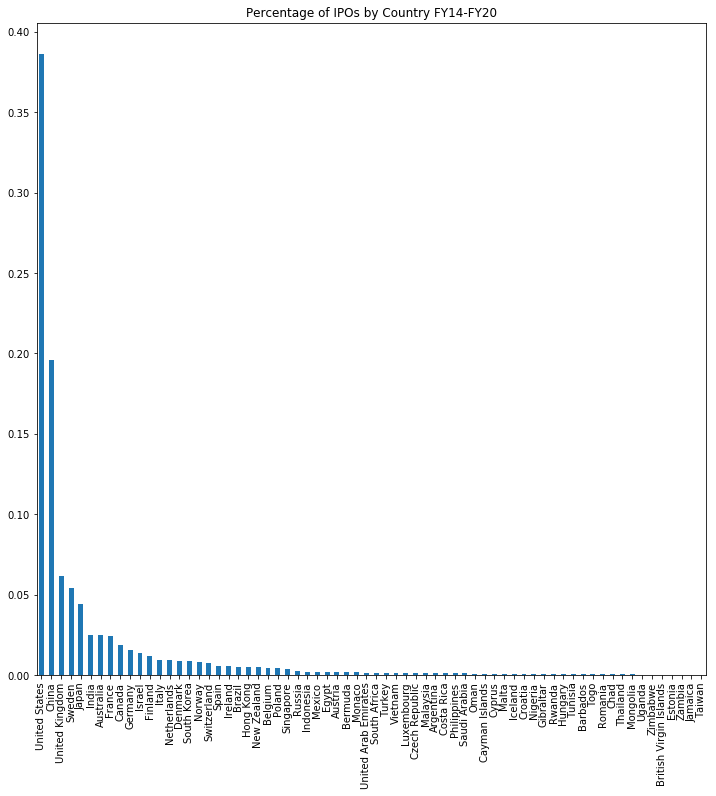

In [58]:
# plot the percentage of IPOs by Country FY14-FY20
earnings_df2['Country'].value_counts(normalize=True).plot.bar(
    figsize=(12,12), title = 'Percentage of IPOs by Country FY14-FY20')

In [70]:
# Create a df with countries that raised the most capital (mUSD) FY14-FY20
most_capital = earnings_df2.groupby(by="Country").mean()
most_capital = most_capital.sort_values(
    by="Capital Raised", ascending=False
).head(25)
most_capital = most_capital.reset_index()
most_capital = most_capital.drop(
    columns = ['Deal #','Post-money Valuation','Opening Price Per Share'])
most_capital

,Country,Capital Raised
0,Luxembourg,938.346250
1,Vietnam,840.877500
2,Austria,793.400833
3,Brazil,703.668265
4,Russia,672.529529
5,Switzerland,666.392100
6,Spain,598.359684
7,Netherlands,521.052410
8,Germany,375.913000
9,South Africa,364.575600


In [62]:
# Plotting the data from the top capital raised by country
most_capital.hvplot.bar(
    "Country",
    "Capital Raised",
    title="IPO Capital Raised by Country",
    xlabel="Country",
    ylabel="Capital Raised (mUSD)",
    height=400,
    rot=90
)

:Bars   [Country]   (Capital Raised)

In [66]:
# Create a df with industries that raised the most capital (mUSD) FY14-FY20
most_capital_ind = earnings_df2.groupby(by="Industry Sector").mean()
most_capital_ind = most_capital_ind.sort_values(
    by="Capital Raised", ascending=False
).head(10)
most_capital_ind = most_capital_ind.reset_index()
most_capital_ind = most_capital_ind.drop(
    columns = ['Deal #','Post-money Valuation','Opening Price Per Share'])
most_capital_ind

,Industry Sector,Capital Raised
0,Financial Services,362.789746
1,Consumer Products and Services (B2C),339.857599
2,Energy,290.289444
3,Materials and Resources,285.262861
4,Information Technology,249.621733
5,Business Products and Services (B2B),184.256461
6,Healthcare,125.193771


In [69]:
# Plotting the data from the industries that raised the most capital over FY14-FY20
most_capital_ind.hvplot.bar(
    "Industry Sector",
    "Capital Raised",
    title="IPO Capital Raised by Industry Sector",
    xlabel="Industry Sector",
    ylabel="Capital Raised (mUSD)",
    height=400,
    rot=90
)

:Bars   [Industry Sector]   (Capital Raised)

### Summary Statistics

In [19]:
# Summary statistics, financial data in mUSD
earnings_df2.describe()

,Deal #,Capital Raised,Post-money Valuation,Opening Price Per Share
count,6739.000000,6739.000000,6739.000000,6.739000e+03
mean,5.204778,227.580420,1333.371361,8.126437e+02
std,3.183546,545.608997,6981.729582,6.578019e+04
min,1.000000,0.007000,0.060000,1.000000e-02
25%,3.000000,45.000000,154.330000,2.950000e+00
50%,4.000000,100.000000,407.940000,1.000000e+01
75%,7.000000,212.500000,970.780000,1.600000e+01
max,33.000000,21767.200000,330903.000000,5.400000e+06


In [26]:
# Lets see how the quant data is correlated with eachother
corr_df = earnings_df2.corr()

# Plot the graph, may use seaborn library for string/object data type variables
corr_df.style.background_gradient()

,Deal #,Capital Raised,Post-money Valuation,Opening Price Per Share
Deal #,1,0.255788,0.161542,-0.00839793
Capital Raised,0.255788,1,0.501389,-0.00331933
Post-money Valuation,0.161542,0.501389,1,-0.00187345
Opening Price Per Share,-0.00839793,-0.00331933,-0.00187345,1


In [34]:
# Plotting relationship between post-money valuation and capital raised
import hvplot.pandas
earnings_df2.hvplot(kind='scatter', x='Capital Raised', y='Post-money Valuation')

:Scatter   [Capital Raised]   (Post-money Valuation)

In [35]:
# Plotting relationship between deal # and capital raised
earnings_df2.hvplot(kind='scatter', x='Capital Raised', y='Deal #')

:Scatter   [Capital Raised]   (Deal #)

            Capital Raised  Post-money Valuation  Opening Price Per Share
Close Date                                                               
2014-01-14       -0.982143             -0.934492                  -0.9875
2014-01-17       99.000000             12.586957                  99.0000
2014-01-17        6.040000             38.160560                   1.0000
2014-01-17       -0.857955             -0.974464                  -0.5000
2014-01-17        6.040000             38.160560                   1.0000
AxesSubplot(0.125,0.2;0.775x0.68)


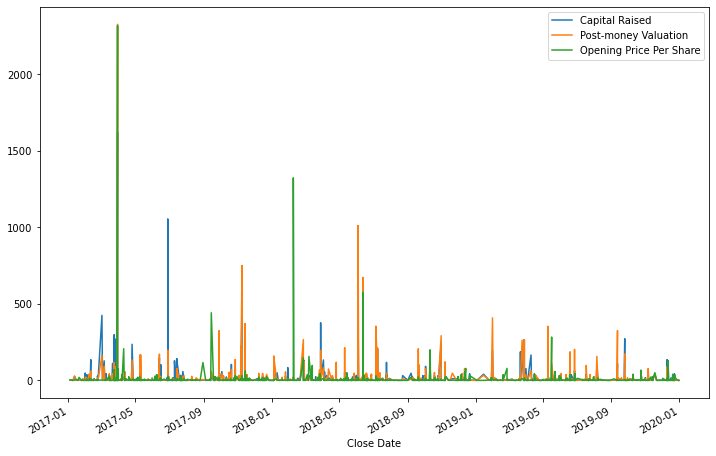

In [19]:
# Create a df of financial data percentage change then drop NaNs
performance_df = earnings_df2.drop(columns = ['Company ID','Company Name','Deal ID','Deal #','Deal Status','Deal Type 1','Industry Sector','Exit Type','City','Country'])
performance_df = performance_df.pct_change().dropna()
print(performance_df.head())
print(performance_df.loc['2017-01-01':'2020-01-01'].plot(figsize=(12,8)))

In [20]:
# Clearly has outliers & volatility, nature of the data
performance_df.std()

Capital Raised              434.177900
Post-money Valuation        148.987997
Opening Price Per Share    2463.096350
dtype: float64

In [21]:
# Calculate the annualized standard deviation for 252 trading days
annual_std = performance_df.std() * np.sqrt(252)
annual_std

Capital Raised              6892.360490
Post-money Valuation        2365.111128
Opening Price Per Share    39100.442383
dtype: float64

## Time Series Analysis

### Decomposition of Capital Raised, Post-money Valuation & Opening Price Per Share using HP Filter

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


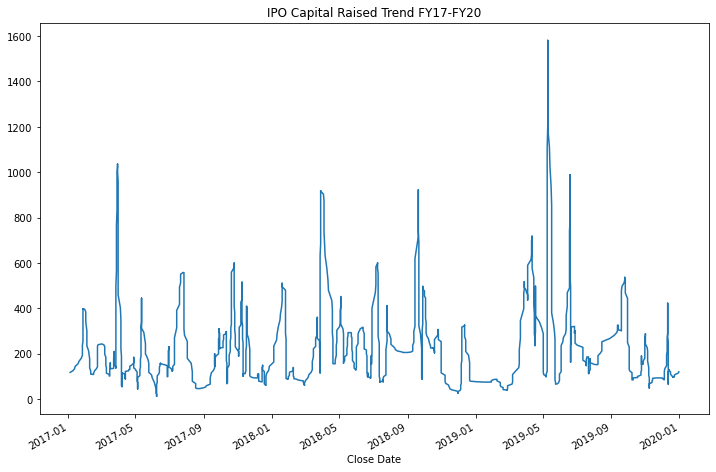

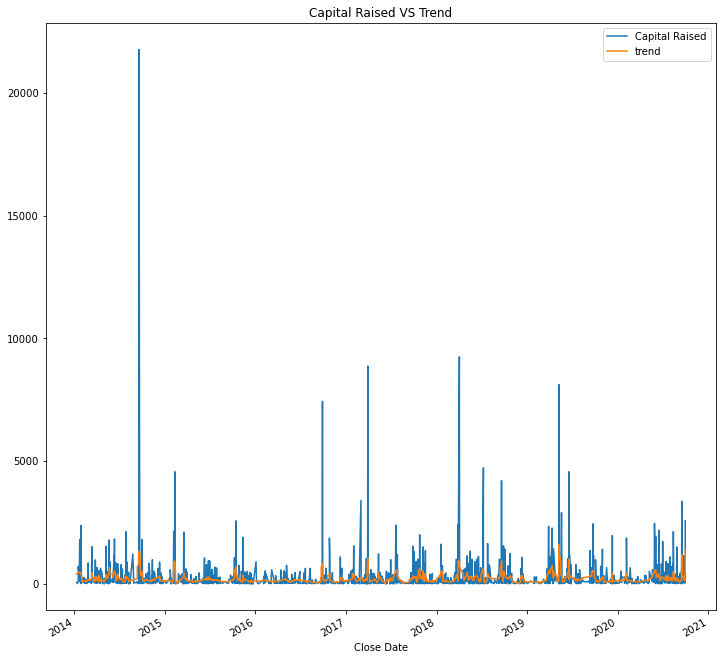

In [22]:
# Interested in seeing the overall trend for the financial columns to observe any trends
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(earnings_df2['Capital Raised'])

# Create a df of the Capital Raised, and add columns for "noise" and "trend" series from above
cap_decomp = earnings_df2[['Capital Raised']].copy()
cap_decomp["noise"] = ts_noise
cap_decomp["trend"] = ts_trend


# Plot the Capital Raised vs the trend 
print(cap_decomp['trend']["2017-01-01":'2020-01-01'].plot(figsize=(12,8), title = 'IPO Capital Raised Trend FY17-FY20'))
print(cap_decomp[['Capital Raised', 'trend']].plot(figsize=(12, 12), title="Capital Raised VS Trend"))

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


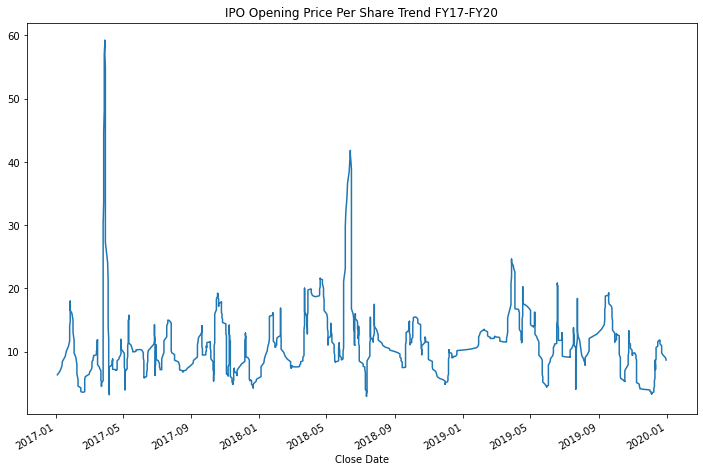

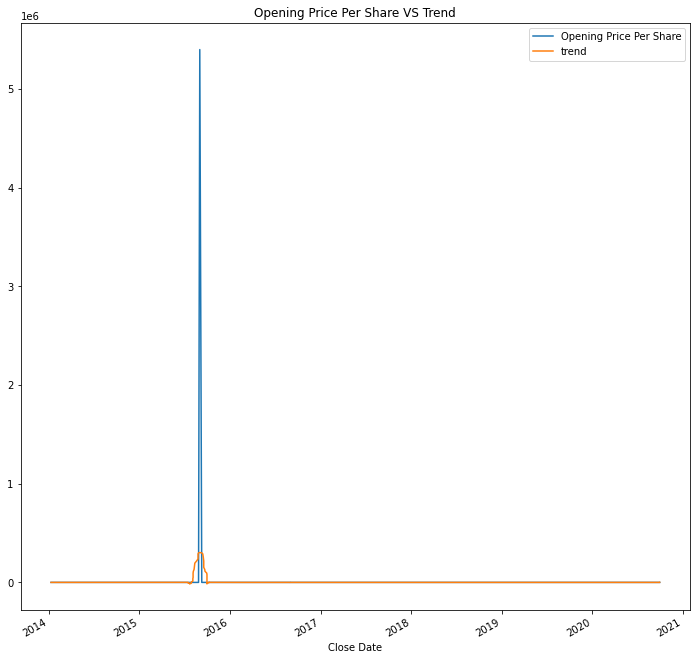

In [23]:
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(earnings_df2['Opening Price Per Share'])

# Create a df of the Opening Price Per Share (opps), and add columns for "noise" and "trend" series from above
opps_decomp = earnings_df2[['Opening Price Per Share']].copy()
opps_decomp["noise"] = ts_noise
opps_decomp["trend"] = ts_trend

print(opps_decomp['trend']["2017-01-01":'2020-01-01'].plot(figsize=(12,8), title = 'IPO Opening Price Per Share Trend FY17-FY20'))
print(opps_decomp[['Opening Price Per Share', 'trend']].plot(figsize=(12, 12), title="Opening Price Per Share VS Trend"))

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


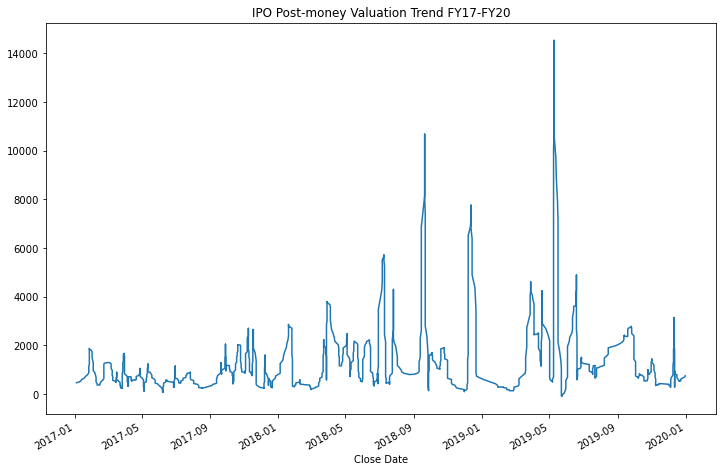

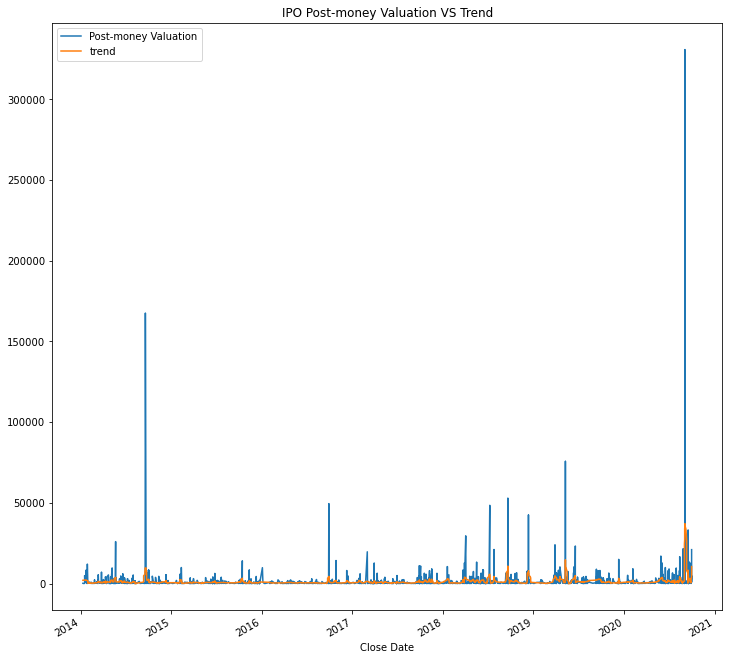

In [24]:
import statsmodels.api as sm
ts_noise, ts_trend = sm.tsa.filters.hpfilter(earnings_df2['Post-money Valuation'])

# Create a df of the Post-money Valuation (pmv), and add columns for "noise" and "trend" series from above
pmv_decomp = earnings_df2[['Post-money Valuation']].copy()
pmv_decomp["noise"] = ts_noise
pmv_decomp["trend"] = ts_trend

print(pmv_decomp['trend']["2017-01-01":'2020-01-01'].plot(figsize=(12,8), title = 'IPO Post-money Valuation Trend FY17-FY20'))
print(pmv_decomp[['Post-money Valuation', 'trend']].plot(figsize=(12, 12), title="IPO Post-money Valuation VS Trend"))